# Curso Análisis de Redes

## Cátedra Teoría de las Telecomunicaciones - Universidad ORT Uruguay



# Control de congestión en redes (2a. parte)

In [1]:
#using Pkg;Pkg.instantiate(); Pkg.update()

## Análisis de TCP/Reno en fase Congestion Avoidance

Como vimos en el cuaderno anterior, al llegar a régimen TCP/Reno opera mayormente en la fase Congestion Avoidance, donde se da la mayor parte de transferencia de paquetes.

Queremos analizar entonces el comportamiento de TCP/Reno en esta fase.

Comencemos por analizar una fuente en un enlace cuello de botella.

### Comportamiento de un enlace cuello de botella

Recordemos el comportamiento respecto a la ventana de un enlace cuello de botella:

![Bottleneck](images/ventana_bottleneck.png)

### Evolución de la ventana, caso buffer pequeño.

Consideremos primero el caso en que el **buffer es pequeño** respecto a la ventana óptima, TCP Reno operará de la siguiente forma:

![TCP Reno low buffer](images/tcp_reno_a.png)

### Evolución de los parámetros de desempeño

Combinando la evolución de la ventana con el comportamiento del enlace obtenemos:

![TCP Reno low buffer b](images/tcp_reno_b.png)

En particular, se observa que TCP no aprovecha al máximo la capacidad en este caso.

### Evolución de la ventana, caso buffer grande

Supongamos ahora que el buffer es suficientemente grande, obtenemos la siguiente evolución:

![TCP Reno high buffer](images/tcp_reno_c.png)

### Evolución de los parámetros de desempeño

Combinando la evolución de la ventana con el comportamiento del enlace obtenemos:

![TCP Reno low buffer d](images/tcp_reno_d.png)

En este caso sí se aprovecha la capacidad al máximo.

### Conclusión

Debido a la forma en que oscila la ventana de TCP/Reno, es necesario un buffer suficientemente grande para mantener la oscilación dentro del buffer y no perder velocidad.

**Buffer óptimo:** $$B=W^* =Cd.$$

De modo que al bajar a la mitad siempre quede encima de $W^*$.

**Problema:** Esto llevó a un fenómeno de "buffer-bloating" debido a que la memoria en buffer pasa a ser del mismo tamaño que la "memoria" de la red, con impacto en la latencia de otros tipos de tráfico. En realidad no es claro que el tamaño del buffer deba ser del mismo tamaño que $Cd$ si hay *múltiples conexiones* y  *no todas las conexiones pierden al mismo tiempo*.

## Modelo en feedback de TCP/Reno

El protocolo de Control de Congestión de TCP/Reno está basado en las *pérdidas* como medida de feedback de la congestión de la red.

Resulta entonces interesante analizar la relación entre el throughput alcanzado y la probabilidad de pérdida de paquetes que se logra.

El primer modelo en este sentido es propuesto hacia 1997 por Matt Mathis.

**Hipótesis:**

 * Condiciones estáticas de la red (congestión, retardo)
 * Pérdidas solo por congestión cuando satura.
 * El protocolo se mantiene en fase CA.

### Diagrama

![TCP/Reno](images/modelo_mathis.png)

### Análisis

Del diagrama anterior, vemos que TCP/Reno opera en régimen entre dos valores de ventana podemos deducir que:

* En régimen, estando en fase CA, a TCP/Reno le lleva $W_{max}/2$ subidas de ventana pasar de la ventana mínima a la máxima.

* Cada subida de ventana demora un $RTT$, por lo que cada ciclo dura $\Delta t = W_{max}/2 \times RTT$.

* En cada ciclo se envían:

$$\# paq = \frac{\frac{W_{max}}{2} + W_{max}}{2} \times \frac{W_{max}}{2} = \bar{W} \times \frac{W_{max}}{2} = \frac{2}{3}\bar{W}^2$$

paquetes.

* En cada ciclo se pierde un paquete al exceder la ventana.

### Fórmula de Mathis

Podemos calcular entonces la probabilidad de pérdida observada por el flujo:

$$p = \frac{1}{\#paq} = \frac{3}{2 \bar{W}^2}$$

O bien la ventana media en función de las pérdidas:

$$\bar{W} = \sqrt{\frac{3}{2p}}$$

Por último la velocidad de transmisión es:

$$x=\frac{\#paq}{\Delta t} = \frac{\bar{W}\times W_{max}/2}{W_{max}/2 \times RTT} = \frac{\bar{W}}{RTT}$$

> Resultando la **Fórmula de Mathis:**
>
> $$x= \frac{1}{RTT} \sqrt{\frac{3}{2p}}.$$

### Ejemplo

Retomemos el ejemplo del cuaderno anterior, donde un TCP/Reno opera en un enlace de $C=100$ paq/s y $d=0.1$s, con un buffer de $5$ paquetes.

En ese caso, en régimen, TCP/Reno oscila entre 8 y 16 paquetes, con una ventana media de $\bar{W}=12$ y una probabilidad de pérdida de:

$$p=\frac{1}{\# paq} = \frac{1}{108}.$$

Aplicando la fórmula de Mathis para la ventana media queda:

$$\bar{W} = \sqrt{\frac{3}{2p}} = \sqrt{162} = 12,72$$

por lo que la aproximación es razonable.

## Modelo de TCP/Reno compartiendo un enlace cuello de botella.

Apliquemos el modelo anterior para analizar el comportamiento de un cuello de botella con *múltiples fuentes*.

* Suponemos $N$ fuentes similares compartiendo un enlace cuello de botella.

* Las $N$ fuentes usan TCP/Reno y tienen el mismo RTT.

![Single link many sources](images/single_link_b.png)



### Modelo

* Suponemos que cada fuente TCP/Reno verifica la fórmula de Mathis:

$$x_i = \frac{1}{RTT} \sqrt{\frac{1.5}{p}}.$$

* Los flujos se combinan en el enlace, produciendo una tasa de arribos:

$$y = \sum_{i=1}^N x_i.$$

* El enlace tiene capacidad $C$, por lo que, de todo lo que le llega, descarta el sobrante. Más exactamente:

$$p = \frac{(y-C)^+}{y} = \left(1-\frac{C}{y}\right)^+ = \max\{1-C/y,0\}.$$

### Solución

Por lo tanto, despreciando el retardo de cola ($RTT=d$) el sistema debe operar en el punto:

$$\left\{\begin{align}
x &= \frac{1}{d} \sqrt{\frac{1.5}{p}}, \\
p &= 1-\frac{C}{Nx}.
\end{align}\right.$$


### Ejemplo

Tomemos $N=10$, $C=1000$ paq/s y $d=100$ ms. y resolvamos numéricamente.

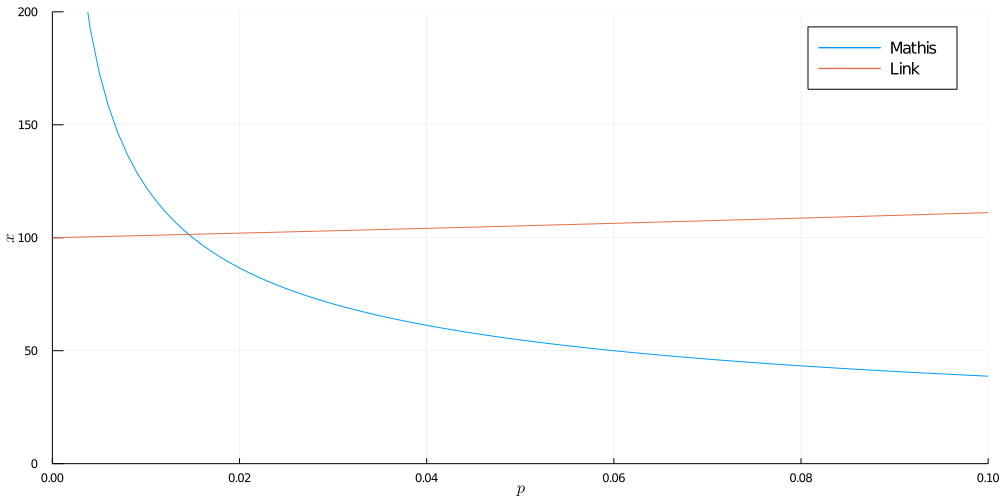

In [2]:
using Plots, LaTeXStrings
default(size=(1000,500), legendfontsize=11)

n=10
C=1000
d=0.1

p=(0:0.001:0.1)

plot(p,1/d*sqrt.(1.5./p),xlim=(0,0.1),ylim=(0,200), label="Mathis", xlabel=L"p", ylabel=L"x")
plot!(p,C/n./(1 .-p), label="Link")

### Solución

Resolviendo el sistema de ecuaciones queda:

$$\frac{1}{d}\sqrt{\frac{1.5}{p}} = \frac{C}{N(1-p)}.$$

De donde $p\approx 0.015$ y $x = 101.5$, y el reparto es equitativo.

### Conclusiones

El modelo de Mathis permite analizar situaciones más generales de compartición de ancho de banda, generalizando la idea anterior. Exploraremos estas ideas en el próximo cuaderno.